<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/machine_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer l√°t√°s betan√≠tott modellek alapj√°n

**Megjegyz√©s**

K√©rj√ºk kapcsolja be a GPU t√°mogat√°st a Colab virtu√°lis g√©pen. V√°lassza a  men√ºb≈ël az
**Edit/Notebook settings** √©s v√°lassza a T4 GPU-t. Ezut√°n a k√∂vetkez≈ë k√≥dblokknak a *Tesla T4* sz√∂veget kell ki√≠rnia.

In [1]:
!nvidia-smi -q -i 0 | grep "Product Name"

    Product Name                          : Tesla T4


## K√©p oszt√°lyoz√°s

A mesters√©ges intelligencia, g√©pi tanul√°s √©s neur√°lis h√°l√≥zatok seg√≠ts√©g√©vel egyre jobb modelleket dolgoznak ki a k√©pek oszt√°lyoz√°s√°ra.
A megoldand√≥ feladat, hogy egy eddig nem l√°tott k√©pet "megmutatva" a modell felhaszn√°l√°s√°val a sz√°m√≠t√≥g√©p mondja meg, ogy mi van a k√©pen. Sz√°mos k√©sz, szabadon let√∂lthet≈ë, m√°r betan√≠tott modell is rendelkez√©s√ºnkre √°ll.

El≈ësz√∂r a DenseNet-Caffe modellt (Densely Connected Convolutional Networks - https://arxiv.org/abs/1608.06993) haszn√°ljuk az ImageNet Large Scale Visual Recognition Challenge 2012 (ILSVRC2012) verseny√©r≈ël. 1000 oszt√°ly megk√ºl√∂nb√∂ztet√©s√©re tan√≠tott√°k meg a modellt



In [2]:
import requests
import imutils
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL

El≈ësz√∂r t√∂lts√ºk le a betan√≠tott *caffe* modelt.



In [3]:
!mkdir sample_data
!wget -q -O sample_data/classification_classes_ILSVRC2012.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/classification_classes_ILSVRC2012.txt
!wget -q -O sample_data/DenseNet_121.caffemodel https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/DenseNet_121.caffemodel
!wget -q -O sample_data/DenseNet_121.prototxt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/DenseNet_121.prototxt

mkdir: cannot create directory ‚Äòsample_data‚Äô: File exists


T√∂lts√ºk be a let√∂lt√∂tt modellt.

In [4]:
# ImageNet oszt√°ly nevek
with open('sample_data/classification_classes_ILSVRC2012.txt', 'r') as f:
   class_names = f.read().split('\n')
model = cv2.dnn.readNet(model='sample_data/DenseNet_121.caffemodel',
                        config='sample_data/DenseNet_121.prototxt',
                        framework='Caffe')
print(class_names[:20])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee']


Egy Python f√ºggv√©nyt k√©sz√≠t√ºnk egy k√©p oszt√°lyoz√°s√°hoz. Az el≈ëfeldolgoz√°s sor√°n √°tm√©retezz√ºk a k√©pet √©s az √°tlagot levonjuk.

In [5]:
def classify_img(image, model):
    """ k√©p oszt√°lyoz√°s caffe modellel """
    # blob k√©sz√≠t√©se a k√©pb√∂l 224 x 224 m√©retre cs√∂kkent√©s
    blob = cv2.dnn.blobFromImage(image=image, scalefactor=0.01, size=(224, 224),
                                 mean=(104, 117, 123))
    model.setInput(blob)        # bemenet be√°ll√≠t√°sa a neur√°lis h√°l√≥zathoz

    outputs = model.forward()   # k√©p √°tk√ºld√©se a neur√°lis h√°l√≥n
    final_outputs = outputs[0]
    final_outputs = final_outputs.reshape(1000, 1)  # 1D t√∂bb√© konvert√°l√°s

    label_id = np.argmax(final_outputs) # legnagyobb val√≥sz√≠n≈±s√©g≈± oszt√°ly indexe
    # convert the output scores to softmax probabilities
    probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
    final_prob = np.max(probs)      # legnagyobb val√≥sz√≠n≈±s√©g √©rt√©ke
    out_name = class_names[label_id]
    out_text = f"{out_name}, {final_prob:.1%}"
    fig, ax = plt.subplots(1, 1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(out_text)
    ax.axis('off')

Egy minta k√©p let√∂lt√©se a BME √©p√ºletek k√∂z√∂tti √°tj√°r√≥r√≥l.

In [6]:
!wget -q -O sample_data/sh1.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/sh1.jpg

In [7]:
img1 = cv2.imread('sample_data/sh1.jpg')
classify_img(img1, model)

A modell szerint egy kolostort √°br√°zol a k√©p.

Az al√°bbi *urls* list√°t kib≈ëv√≠thetj√ºk, fel√ºl√≠rhatjuk az interneten tal√°lhat√≥ k√©pek linkj√©vel.

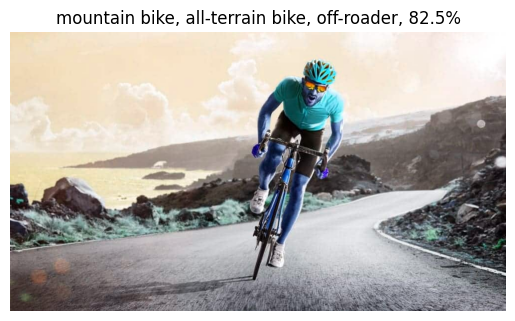

In [ ]:
urls = ['https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=0d3f33fb6aa6e0154b7713a00454c83d',
        'https://lemonbin.com/wp-content/uploads/2020/06/cyclist-june172020-min.jpg',
        'https://5.imimg.com/data5/TestImages/LC/LC/YS/SELLER-18789923/domestic-diaphragm-type-gas-meter-500x500.jpg']
for url in urls:
    im = np.array(PIL.Image.open(requests.get(url, stream=True).raw))
    classify_img(im)

## CIFAR-10 minta adatok

A CIFAR-10 adatrendszer 60000 32 x 32 felbont√°s√∫ sz√≠nes k√©pet tartalmaz, melyeket 10 oszt√°lyba soroltak (https://www.cs.toronto.edu/~kriz/cifar.html).

Oszt√°lyok:

* rep√ºl≈ëg√©p
* aut√≥
* mad√°r
* macska
* szarvas
* kutya
* b√©ka
* l√≥
* haj√≥
* kamion

A Keras k√∂nyvt√°r seg√≠ts√©g√©vel hozzunk l√©tre egy modellt.


In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from pathlib import Path
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

T√∂lts√ºk le a minta k√©peket √©s n√©zz√ºnk meg n√©h√°ny v√©letlenszer≈±en k√©pet.

170498071/170498071 [==============================] - 2s 0us/step


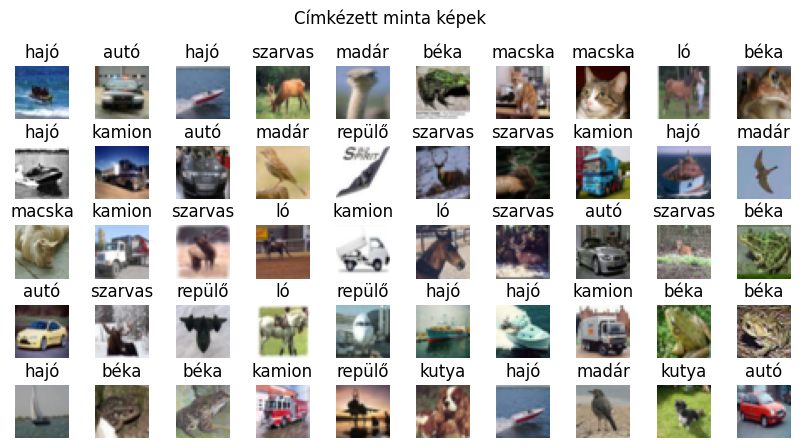

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#                   0        1       2         3         4         5        6      7      8       9
class_labels = ["rep√ºl≈ë", "aut√≥", "mad√°r", "macska", "szarvas", "kutya", "b√©ka", "l√≥", "haj√≥", "kamion"]
num_classes = len(class_labels)

rows = 5; cols = 10
rand_ind = np.random.randint(0, high=1000, size=rows*cols, dtype=int)
fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
fig.suptitle('C√≠mk√©zett minta k√©pek')
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    img_ind = rand_ind[i]
    axes[i].imshow(x_test[img_ind])
    axes[i].set_title(class_labels[int(y_test[img_ind][0])])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Hozzuk l√©tre a modell√ºnket √©s tan√≠tsuk be a CIFAR-10 adatk√©szlet felhaszn√°l√°s√°val. Ez n√©h√°ny percet vesz ig√©nybe.

K√©tszer 32 darab, k√©tszer 64 darab √©s k√©tszer 128 darab 3 x 3-as konvol√∫ci√≥s sz≈±r≈ët √©s egy rejtett r√©teget tartalmaz a modell.




In [3]:
%%time
# k√©pek normaliz√°l√°sa a 0-1 tartom√°nyba
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Oszt√°ly c√≠mk√©k konvert√°l√°sa bin√°ris oszt√°ly m√°trix√°
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# modell l√©trehoz√°sa √©s r√©tegek hozz√°ad√°sa
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 20
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
782/782 [==============================] - 55s 66ms/step - loss: 1.7136 - accuracy: 0.4118 - val_loss: 1.4067 - val_accuracy: 0.4968
Epoch 2/20
782/782 [==============================] - 50s 64ms/step - loss: 1.1694 - accuracy: 0.5811 - val_loss: 1.1065 - val_accuracy: 0.6062
Epoch 3/20
782/782 [==============================] - 50s 63ms/step - loss: 0.9964 - accuracy: 0.6473 - val_loss: 0.9271 - val_accuracy: 0.6726
Epoch 4/20
782/782 [==============================] - 50s 64ms/step - loss: 0.8918 - accuracy: 0.6861 - val_loss: 0.7610 - val_accuracy: 0.7290
Epoch 5/20
782/782 [==============================] - 49s 62ms/step - loss: 0.8117 - accuracy: 0.7178 - val_loss: 0.7097 - val_accuracy: 0.7480
Epoch 6/20
782/782 [==============================] - 49s 63ms/step - loss: 0.7578 - accuracy: 0.7376 - val_loss: 0.6789 - val_accuracy: 0.7667
Epoch 7/20
782/782 [==============================] - 50s 63ms/step - loss: 0.7116 - accuracy: 0.7531 - val_loss: 0.6567 - val_accuracy:

In [37]:
score, acc = model.evaluate(x_train, y_train, batch_size=64, verbose=0)
print(f'Modell pontoss√°g:{acc:.1%}')
score, acc = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print(f'Teszt  pontoss√°g:{acc:.1%}')
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].set_title('Vesztes√©g')
ax[0].plot(history.history['loss'], color='blue', label='train')
ax[0].plot(history.history['val_loss'], color='orange', label='test')
ax[0].legend()
ax[1].set_title('Oszt√°lyoz√°s pontoss√°ga')
ax[1].plot(history.history['accuracy'], color='blue', label='train')
ax[1].plot(history.history['val_accuracy'], color='orange', label='test')
ax[1].legend(loc=4)
plt.subplots_adjust(wspace=0.5)

Modell pontoss√°g:90.1%
Teszt  pontoss√°g:84.0%


In [38]:
y_pred = model.predict(x_test)
rows = 5; cols = 10
rand_ind = np.random.randint(0, high=10000, size=rows*cols, dtype=int)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.2, rows * 1.2))
fig.suptitle('Eredm√©ny teszt k√©peken')
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    img_ind = rand_ind[i]
    axes[i].imshow(x_test[img_ind])
    k = np.argmax(y_pred[img_ind])
    axes[i].set_title(f"{class_labels[k][:3]} {y_pred[img_ind, k]:.0%}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

313/313 [==============================] - 1s 2ms/step


Pr√≥b√°ljuk ki a modellt eddig nem haszn√°lt k√©peken!

In [39]:
# add more images here from the ten classes
!wget -q https://www.shutterstock.com/image-photo/forg-260nw-151350374.jpg
!wget -q https://imagestore1.blogger.hu/25_150709_854054_a2bb73f454241fc91a575ab9596916e3_e27a2a_301.jpg
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Female_bengal_cat_outdoor.jpg/250px-Female_bengal_cat_outdoor.jpg

In [40]:
# collecting images from local folder
import glob
images = glob.glob("*.png") + glob.glob("*.jpg")

Bet√∂ltj√ºk a k√©peket √©s egy 4D numpy t√∂mbbe tessz√ºk ≈ëket.

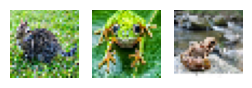

In [45]:
np_images = np.zeros((len(images), 32, 32, 3))
fig, ax = plt.subplots(1, len(images), figsize=(len(images), 1))
ax = ax.ravel()
for i, img_name in enumerate(images):
    # Load and resize to 32x32 pixels (as required by this model)
    img = image.load_img(img_name, target_size=(32, 32))
    # k√©pek √°talak√≠t√°sa numpy t√∂mb√∂kk√© √©s normaliz√°l√°s
    np_images[i] = image.img_to_array(img).astype('float32') / 255.0
    ax[i].imshow(img)
    ax[i].axis('off')
#plt.subplots_adjust(wspace=0.5)

Making prediction from the model

In [42]:
results = model.predict(np_images)
preds = np.argmax(results, axis=1)

1/1 [==============================] - 0s 291ms/step


Eredm√©nyek ki√≠r√°sa

In [44]:
for i, pred in enumerate(preds):
    print(f"{images[i]} k√©pen egy {class_labels[pred]} van ({results[i, pred]:.1%})")

250px-Female_bengal_cat_outdoor.jpg k√©pen egy b√©ka van (79.4%)
25_150709_854054_a2bb73f454241fc91a575ab9596916e3_e27a2a_301.jpg k√©pen egy b√©ka van (97.6%)
forg-260nw-151350374.jpg k√©pen egy b√©ka van (93.4%)


# Objektum detekt√°l√°s YOLO5-el



A YOLO (You Only Look Once) modell egy k√©pen t√∂bb kisebb objektum detekt√°l√°s√°ra k√©pes, ak√°r vide√≥ felv√©teleken val√≥s id≈ëben. Tan√≠t√°s√°ra az MS COCO adathalmazt haszn√°lt√°k, mely 80 objektum kateg√≥ri√°t √©s t√∂bb mint 200000 c√≠mk√©zett k√©pet tartalmaz.

In [46]:
# k√©sz modell let√∂lt√©se
%cd
!git clone -q https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml  # sz√ºks√©ges Python modulok telep√≠t√©se

/root
/root/yolov5
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 663.1/663.1 kB 8.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.5/4.5 MB 30.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 757.2/757.2 kB 51.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 62.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚

In [47]:
import glob
import cv2
from matplotlib import pyplot as plt
import torch
import utils
display = utils.notebook_init()  # telep√≠t√©s ellen≈ërz√©se

YOLOv5 üöÄ v7.0-313-g712de55a Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 30.2/201.2 GB disk)


Feldolgozand√≥ k√©pek let√∂lt√©se.

In [48]:
!wget -q -O data/images/stop.jpg https://cdn.powa.com/baderscott.com/images/wp-content/uploads/2020/06/atlanta-ga-car-accident-lawyer-running-a-stop-signal-300x200-245-critical-desktop.jpg.webp
#!wget -q -O data/images/president.jpg http://gita.hu/keptar/gita2022/IMG_7504.JPG
#!wget -q -O data/images/audience.jpg http://gita.hu/keptar/gita2022/IMG_7506.JPG
#!wget -q -O data/images/party.jpg http://gita.hu/keptar/gita2022/IMG_7802.JPG
!wget -q -O data/images/audience.jpg http://www.agt.bme.hu/keptar/workshop10/BY0A3592.JPG

A k√©pek feldolgoz√°sa

In [49]:
!rm -rf runs/detect/exp/
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-313-g712de55a Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 237MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ‚ö†Ô∏è NMS time limit 0.550s exceeded
image 1/4 /root/yolov5/data/images/audience.jpg: 448x640 18 persons, 1 bottle, 4 chairs, 1 clock, 49.4ms
image 2/4 /root/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 81.0ms
image 3/4 /root/yolov5/data/images/stop.jpg: 448x640 1 stop sign, 9.2ms
image 4/4 

Feldolgoz√°s eredm√©ny√©nek megjelent√©s.

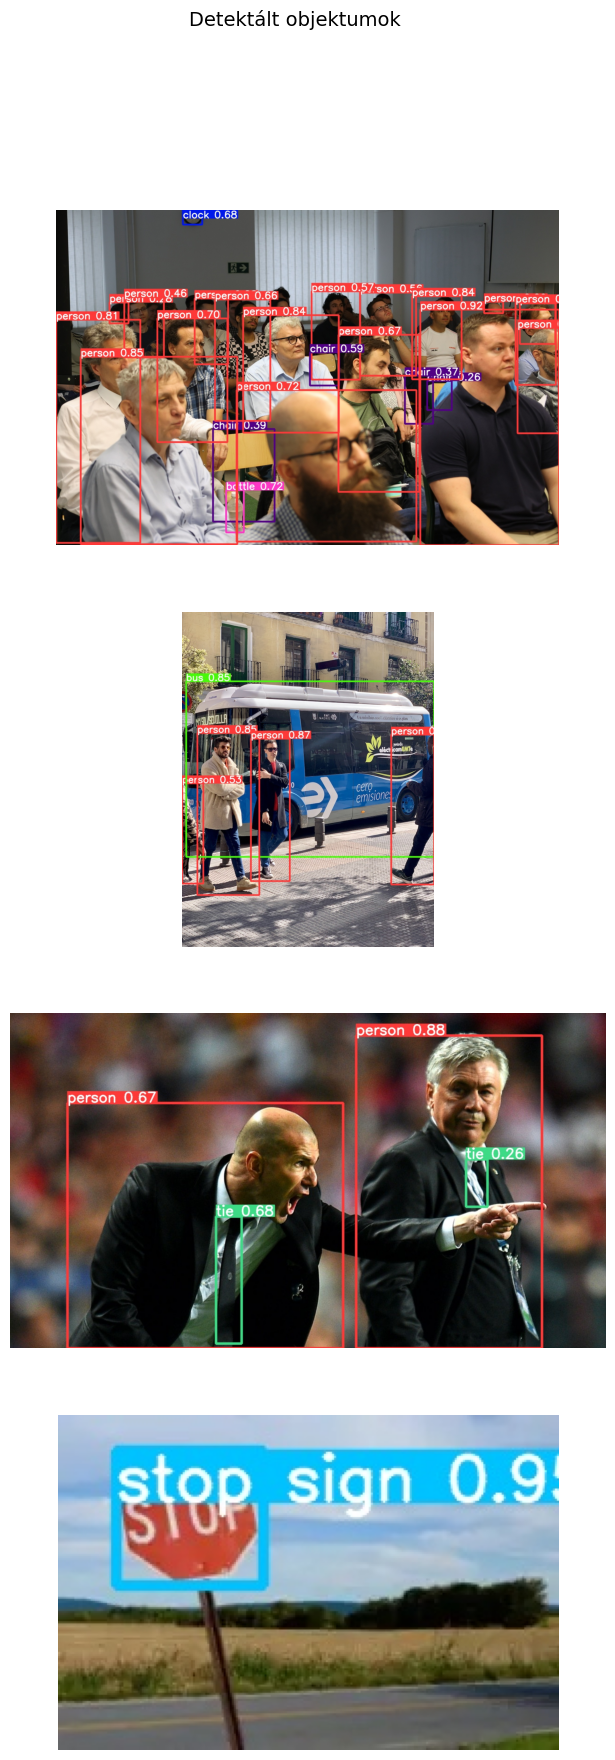

In [51]:
im_list = glob.glob('runs/detect/exp/*.jpg')
n = len(im_list)
fig, axes = plt.subplots(n, 1, figsize=(10, n*5))
fig.suptitle('Detekt√°lt objektumok', fontsize=14)
for i in range(n):
    im = cv2.imread(im_list[i])
    axes[i].imshow( cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')